<h1 style=text-align:center>KMEANS</h1>

<b>KMeans clustering merupakan algoritma clustering pada data mining yang masuk dalam kelompok non hirarki yang digunakan dalam membagi data menjadi beberapa kelompok dengan sistem partisi.

<h2>SOAL 1</h2>

In [4]:
import pandas as pd
data_koordinat = [['A',1,2],['B',2,3],['C',3,3],['D',8,8],['E',9,8],['F',8,9]]
DF_KDT = pd.DataFrame(data_koordinat,columns=(['Pelanggan','X','Y']))

In [5]:
DF_KDT

,Pelanggan,X,Y
0,A,1,2
1,B,2,3
2,C,3,3
3,D,8,8
4,E,9,8
5,F,8,9


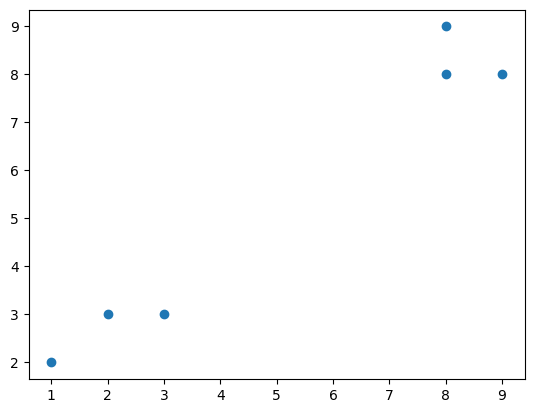

In [7]:
import matplotlib.pyplot as plt 
plt.scatter(DF_KDT['X'],DF_KDT['Y'])

In [8]:
DF_KDT_FEATURE = DF_KDT.drop(['Pelanggan'],axis=1)

In [9]:
DF_KDT_FEATURE

,X,Y
0,1,2
1,2,3
2,3,3
3,8,8
4,9,8
5,8,9


In [15]:
from sklearn.cluster import KMeans

In [22]:
cluster = []
for i in range(1,7) :
    km = KMeans(n_clusters=i).fit(DF_KDT_FEATURE)
    cluster.append(km.inertia_)
    

In [30]:
print(cluster)

[112.33333333333334, 4.0, 3.166666666666667, 1.0, 0.5, 0.0]


In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 7)), y=cluster, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

ValueError: All arrays must be of the same length

C:\Users\Dell\AppData\Local\Temp\ipykernel_14444\1024302961.py:9: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(x=DF_KDT_FEATURE['X'], y=DF_KDT_FEATURE['Y'], hue=X['Labels'],


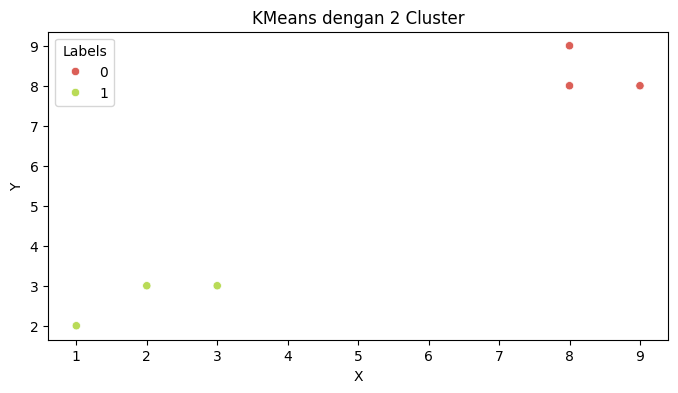

In [43]:
# membuat objek KMeans
km5 = KMeans(n_clusters=2).fit(DF_KDT_FEATURE)
 
# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_
 
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=DF_KDT_FEATURE['X'], y=DF_KDT_FEATURE['Y'], hue=X['Labels'],
                palette=sns.color_palette('hls',5))
plt.title('KMeans dengan 2 Cluster')
plt.show()

<h2 style=text-align:center>LATIHAN 2 TENTANG PARFUME</h2>

In [44]:
parfume ='../../DATASET/ebay_mens_perfume.csv'
DF_M_PERFUME = pd.read_csv(parfume)

In [46]:
DF_M_PERFUME.head(5)

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
0,Dior,Christian Dior Sauvage Men's EDP 3.4 oz Fragra...,Eau de Parfum,84.99,US $84.99/ea,10.0,More than 10 available / 116 sold,116.0,"May 24, 2024 10:03:04 PDT","Allen Park, Michigan, United States"
1,AS SHOW,A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...,Eau de Parfum,109.99,US $109.99,8.0,8 available / 48 sold,48.0,"May 23, 2024 23:07:49 PDT","Atlanta, Georgia, Canada"
2,Unbranded,HOGO BOSS cologne For Men 3.4 oz,Eau de Toilette,100.00,US $100.00,10.0,More than 10 available / 27 sold,27.0,"May 22, 2024 21:55:43 PDT","Dearborn, Michigan, United States"
3,Giorgio Armani,Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...,Eau de Toilette,44.99,US $44.99/ea,2.0,2 available / 159 sold,159.0,"May 24, 2024 03:30:43 PDT","Reinholds, Pennsylvania, United States"
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,Fragrances,16.91,US $16.91,NaN,Limited quantity available / 156 sold,156.0,"May 24, 2024 07:56:25 PDT","Brooklyn, New York, United States"


In [47]:
DF_M_PERFUME.shape

(1000, 10)

In [48]:
DF_M_PERFUME.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              999 non-null    object 
 1   title              1000 non-null   object 
 2   type               997 non-null    object 
 3   price              1000 non-null   float64
 4   priceWithCurrency  1000 non-null   object 
 5   available          889 non-null    float64
 6   availableText      997 non-null    object 
 7   sold               994 non-null    float64
 8   lastUpdated        947 non-null    object 
 9   itemLocation       1000 non-null   object 
dtypes: float64(3), object(7)
memory usage: 78.2+ KB


In [129]:
DF_M_PERFUME['type'].unique()

array(['Eau de Parfum', 'Eau de Toilette', 'Fragrances', 'Perfume', '/',
       'PARFUM', 'Parfum', 'Concentrated Uncut Pure Body Oil',
       'LE PARFUM', 'Eau De Parfum', nan, 'Unscented', 'Eau de Cologne',
       '~ THE ONE EAU DE PARFUM SPRAY ~', 'EXTRAIT DE PARFUM',
       'Eau De Toilette', 'Eau De Parfum Intense', 'Pheromone',
       'Aftershave', 'Fragrance & Perfume', 'Eau de Perfume',
       'Jo Malone Cologne Intense Spray', 'Y', 'Gift Sets',
       'Fragrance Rolling Ball', 'Body Spray', 'Eau de toilette',
       'Eau de Toillette',
       'Eau De Toilette, Eau De Parfum, Eau De Parfum Intense', 'Cologne',
       'le parfum', 'Eau de Toilette Intense',
       'Eau de Cologne Spray, Cologne Spray', 'Extrait De Parfum',
       'Fine Cologne', 'Does not apply', 'EDT', 'Extrait de Parfum',
       'Editions Parfums', 'DIOR HOMME COLOGNE', 'Deodorant', 'De Nuit',
       'Eau de Toilette, Cologne Spray', 'Parfum Intense',
       'Eau de Parfum Intense', 'cologne', 'EAU DE COLOGNE 

In [80]:
kolom_object = []
kolom_non_obj = []
for col in DF_M_PERFUME.columns :
    if DF_M_PERFUME[col].dtype == 'object' :
        kolom_object.append(col)
    else :
        kolom_non_obj.append(col)

In [82]:
kolom_object

['brand',
 'title',
 'type',
 'priceWithCurrency',
 'availableText',
 'lastUpdated',
 'itemLocation']

In [76]:
kolom_non_obj

['price', 'available', 'sold']

In [83]:
DF_M_PERFUME_BARU = DF_M_PERFUME.drop(['brand',
 'title',
 'type',
 'priceWithCurrency',
 'availableText',
 'lastUpdated',
 'itemLocation','available'], axis=1)

In [104]:
DF_M_PERFUME_BARU

,price,sold
0,84.99,116.0
1,109.99,48.0
2,100.00,27.0
3,44.99,159.0
4,16.91,156.0
...,...,...
995,20.28,1613.0
996,30.58,31.0
997,39.99,305.0
998,9.99,22.0


In [100]:
DF_M_PERFUME_BARU.dropna(inplace=True)

In [102]:
DF_M_PERFUME_BARU.isna().sum()

price    0
sold     0
dtype: int64

In [124]:
clusters = []
for i in range(1,10) :
    km = KMeans(n_clusters=i).fit(DF_M_PERFUME_BARU)
    clusters.append(km.inertia_)

In [ ]:
print()

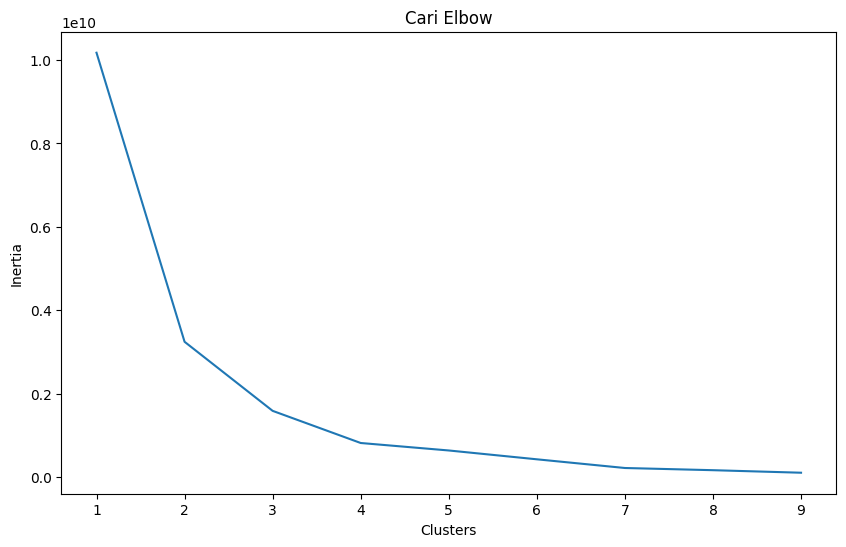

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 
# membuat plot inertia
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_14444\602291098.py:9: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(x=DF_M_PERFUME_BARU['price'], y=DF_M_PERFUME_BARU['sold'], hue=DF_M_PERFUME_BARU['Labels'],


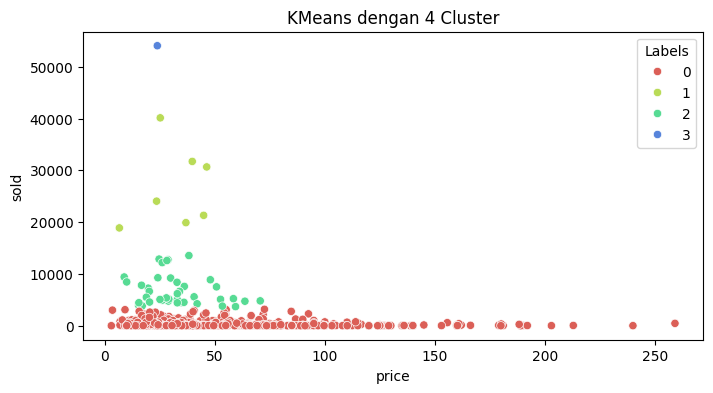

In [128]:
# membuat objek KMeans
km5 = KMeans(n_clusters=4).fit(DF_M_PERFUME_BARU)
 
# menambahkan kolom label pada dataset
DF_M_PERFUME_BARU['Labels'] = km5.labels_
 
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=DF_M_PERFUME_BARU['price'], y=DF_M_PERFUME_BARU['sold'], hue=DF_M_PERFUME_BARU['Labels'],
                palette=sns.color_palette('hls',5))
plt.title('KMeans dengan 4 Cluster')
plt.show()

<h2 style=text-align:center>LATIHAN 3 TENTANG OBESITY DAN PKE</h2>

<h2>TAHAP 1 MENDEFINISIKAN DATASET</h2>

In [3]:
import pandas as pd

In [4]:
data_obs = [[36.2,65000],[28.9,9000],[4.3,40000],[35.4,21000],[29.0,55000],[3.8,2100],[22.3,48000],[28.3,6000],[22.1,9000],[6.2,10000]]
DF_OBS = pd.DataFrame(data_obs,columns=(['Tingkat Obesitas','Pendapatan Per Kapita']))

In [5]:
DF_OBS

,Tingkat Obesitas,Pendapatan Per Kapita
0,36.2,65000
1,28.9,9000
2,4.3,40000
3,35.4,21000
4,29.0,55000
5,3.8,2100
6,22.3,48000
7,28.3,6000
8,22.1,9000
9,6.2,10000


In [8]:
import numpy as np
import matplotlib.pyplot as plt

21.65 12.519074335677628 26510 23260.86126235799


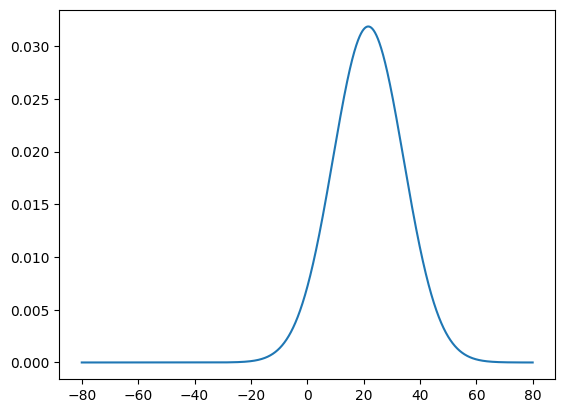

In [18]:
from scipy.stats import norm 
import statistics 
  
# Plot between -10 and 10 with .001 steps. 
x_axis = np.arange(-80, 80, 0.01) 
x_axis = np.arange(-80, 80, 0.01) 
  
# Calculating mean and standard deviation 
mean = statistics.mean(DF_OBS['Tingkat Obesitas']) 
sd = statistics.stdev(DF_OBS['Tingkat Obesitas']) 
mean2 = statistics.mean(DF_OBS['Pendapatan Per Kapita']) 
sd2 = statistics.stdev(DF_OBS['Pendapatan Per Kapita'])

print(mean,sd,mean2,sd2)

  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd)) 
plt.show() 

<h2>Menentukan jumlah k kluster yang akan dibentuk.</h2>

In [21]:
from sklearn.cluster import KMeans

In [22]:
clusters_obs = []
for i in range(1,11) :
    km = KMeans(n_clusters=i).fit(DF_OBS)
    clusters_obs.append(km.inertia_)

Setelah disesuaikan, inertia_adalah jumlah jarak kuadrat sampel ke pusat klaster terdekat (jumlah kuadrat dalam klaster). Ini adalah ukuran seberapa baik model pengelompokan mengelompokkan titik data. Nilai inersia yang lebih rendah umumnya menunjukkan pengelompokan yang lebih baik.

In [24]:
import seaborn as sns

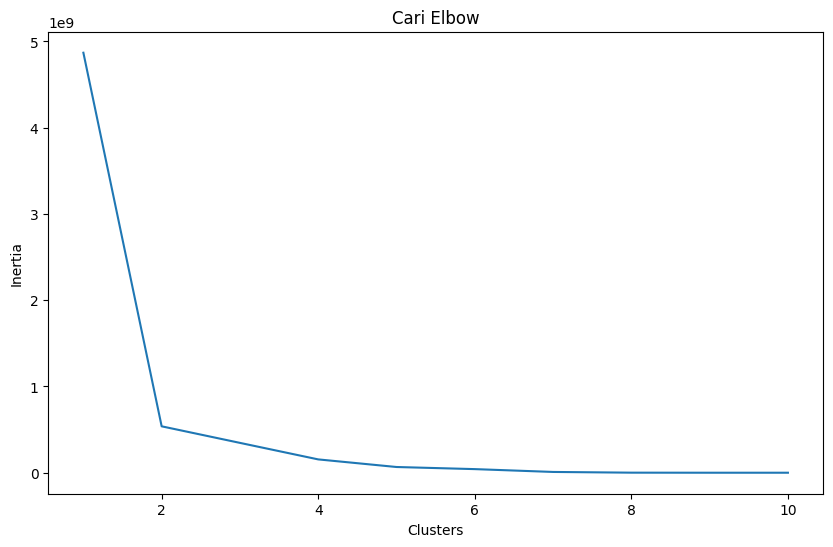

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=list(range(1, 11)), y=clusters_obs, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

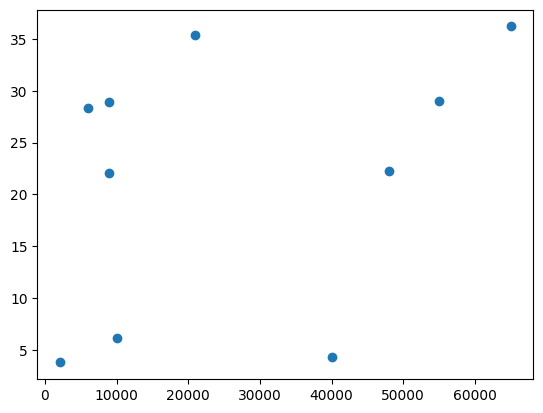

In [154]:
plt.scatter(DF_OBS['Pendapatan Per Kapita'],DF_OBS['Tingkat Obesitas'])
plt.show()

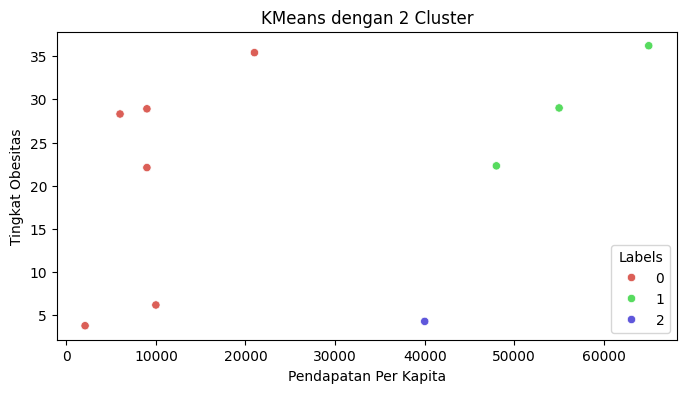

In [158]:
# membuat objek KMeans
km5 = KMeans(n_clusters=3).fit(DF_OBS)
 
# menambahkan kolom label pada dataset
DF_OBS['Labels'] = km5.labels_
 
# membuat plot KMeans dengan2 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=DF_OBS['Pendapatan Per Kapita'], y=DF_OBS['Tingkat Obesitas'], hue=DF_OBS['Labels'],
                palette=sns.color_palette('hls',3))
plt.title('KMeans dengan 2 Cluster')
plt.show()

In [159]:
DF_OBS

,Tingkat Obesitas,Pendapatan Per Kapita,Labels
0,36.2,65000,1
1,28.9,9000,0
2,4.3,40000,2
3,35.4,21000,0
4,29.0,55000,1
5,3.8,2100,0
6,22.3,48000,1
7,28.3,6000,0
8,22.1,9000,0
9,6.2,10000,0


Dalam contoh ini:

Klaster 0: Negara-negara dengan tingkat obesitas tinggi dan pendapatan per kapita relatif tinggi, seperti Amerika Serikat, Arab Saudi, dan Australia.
Klaster 1: Negara-negara dengan tingkat obesitas menengah dan pendapatan per kapita menengah hingga rendah, seperti Meksiko, Afrika Selatan, dan Brasil.
Klaster 2: Negara-negara dengan tingkat obesitas rendah dan pendapatan per kapita yang bervariasi, seperti Jepang, India, dan Cina.
Interpretasi:
Negara-negara dalam Klaster 0 mungkin memerlukan kebijakan kesehatan yang berbeda dari negara-negara di Klaster 1 atau Klaster 2 karena profil sosio-ekonominya yang berbeda.
Negara-negara di Klaster 1 mungkin berada dalam situasi transisi, dengan tantangan kesehatan dan ekonomi yang unik, sehingga bisa memerlukan strategi intervensi yang berbeda.
Klaster 2 bisa mencakup negara-negara dengan pendapatan per kapita yang lebih rendah atau budaya yang memiliki gaya hidup yang lebih sehat (seperti Jepang), sehingga tingkat obesitas mereka rendah meskipun pendapatan per kapita berbeda.